In [171]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split

In [172]:
aks=os.listdir("C:/Users/manor/Desktop/Image Processing/as/")
kn=os.listdir("C:/Users/manor/Desktop/Image Processing/kn/")
mr=os.listdir("C:/Users/manor/Desktop/Image Processing/mr/")

In [173]:
limit=10
aks_images = [None]*limit
kn_images = [None]*limit
mr_images = [None]*limit
j=0
for i in aks:
    if (j<limit):
        aks_images[j]= imread("C:/Users/manor/Desktop/Image Processing/as/"+i)
        j+=1
    else:
        break

j=0
for i in kn:
    if(j<limit):
        kn_images[j]=imread("C:/Users/manor/Desktop/Image Processing/kn/"+i)
        j+=1
    else:
        break

j=0
for i in mr:
    if(j<limit):
        mr_images[j]=imread("C:/Users/manor/Desktop/Image Processing/mr/"+i)
        j+=1
    else:
        break        
        

In [174]:
aks_gray=[None]*limit
kn_gray=[None]*limit
mr_gray=[None]*limit
j=0

for i in aks:
    if(j<limit):
        aks_gray[j]=rgb2gray(aks_images[j])
        j+=1
    else:
        break
j=0
for i in kn:
    if(j<limit):
        kn_gray[j]=rgb2gray(kn_images[j])
        j+=1
    else:
        break
    

j=0
for i in mr:
    if(j<limit):
        mr_gray[j]=rgb2gray(mr_images[j])
        j+=1
    else:
        break


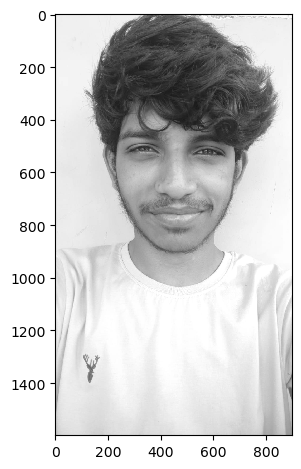

In [175]:
imshow(mr_gray[0])

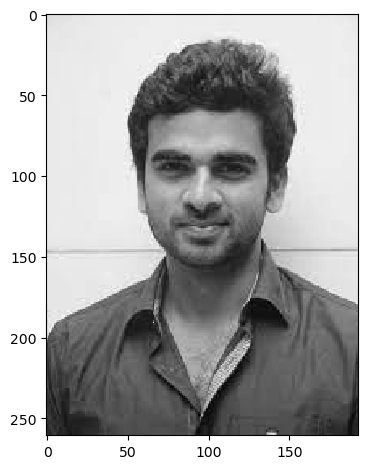

In [176]:
imshow(aks_gray[0])

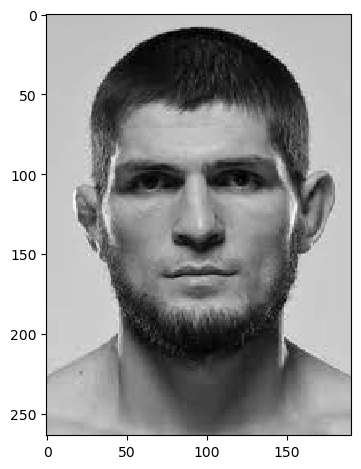

In [177]:
imshow(kn_gray[0])

In [178]:
mr_gray[2].shape

(1599, 899)

In [179]:
for j in range(10):
    mr_temp=mr_gray[j]
    mr_gray[j]=resize(mr_temp,(512,512))

In [180]:
for j in range(10):
    aks_temp=aks_gray[j]
    aks_gray[j]=resize(aks_temp,(512,512))
for j in range(10):
    kn_temp=kn_gray[j]
    kn_gray[j]=resize(kn_temp,(512,512))


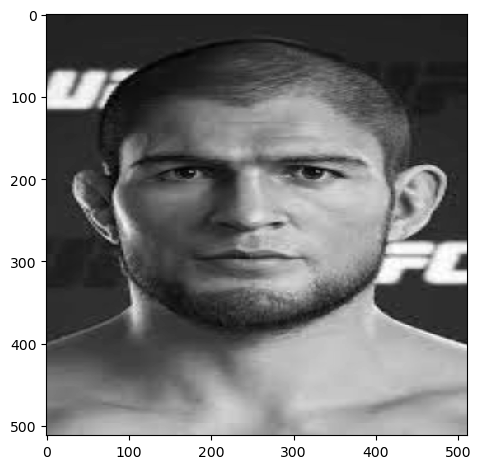

In [181]:
imshow(kn_gray[2])

In [182]:
len_of_mr=len(mr_gray)
len_of_kn=len(kn_gray)
len_of_aks=len(aks_gray)

In [183]:
image_size_mr=mr_gray[1].shape
image_size_aks=aks_gray[1].shape
image_size_kn=kn_gray[1].shape

In [184]:
image_size_mr

(512, 512)

In [185]:
flatten_size_mr=image_size_mr[0]*image_size_mr[1]
flatten_size_aks=image_size_aks[0]*image_size_aks[1]
flatten_size_kn=image_size_kn[0]*image_size_kn[1]


In [186]:
flatten_size_mr

262144

In [187]:
for i in range(len_of_mr):
    mr_gray[i]= np.ndarray.flatten(mr_gray[i].reshape(flatten_size_mr,1))
for i in range(len_of_aks):
    aks_gray[i]= np.ndarray.flatten(aks_gray[i].reshape(flatten_size_aks,1))
for i in range(len_of_kn):
    kn_gray[i]= np.ndarray.flatten(kn_gray[i].reshape(flatten_size_kn,1))

In [188]:
mr_gray=np.dstack(mr_gray)
aks_gray=np.dstack(aks_gray)
kn_gray=np.dstack(kn_gray)

In [189]:
kn_gray.shape

(1, 262144, 10)

In [190]:
mr_gray=np.rollaxis(mr_gray,axis=2,start=0)
aks_gray=np.rollaxis(aks_gray,axis=2,start=0)
kn_gray=np.rollaxis(kn_gray,axis=1,start=0)

In [191]:
aks_gray=np.rollaxis(aks_gray,axis=2,start=1)
mr_gray=np.rollaxis(mr_gray,axis=2,start=1)

In [192]:
aks_gray.shape

(10, 262144, 1)

In [193]:
mr_gray=mr_gray.reshape(len_of_mr,flatten_size_mr)
aks_gray=aks_gray.reshape(len_of_aks,flatten_size_aks)
kn_gray=kn_gray.reshape(len_of_kn,flatten_size_kn)

In [194]:
aks_gray.shape

(10, 262144)

In [195]:
mr_data=pd.DataFrame(mr_gray)
kn_data=pd.DataFrame(kn_gray)
aks_data=pd.DataFrame(aks_gray)

In [196]:
aks_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.860389,0.860389,0.860389,0.860389,0.860935,0.861984,0.863033,0.863486,0.863848,0.864450,...,0.110209,0.123306,0.135132,0.145200,0.143722,0.142244,0.145854,0.154992,0.164131,0.158165
1,0.682184,0.682112,0.682654,0.683422,0.684718,0.685798,0.685798,0.685860,0.687698,0.689536,...,0.532713,0.503546,0.474378,0.416129,0.356876,0.361090,0.377997,0.393254,0.407803,0.405863
2,0.548413,0.547620,0.548717,0.549814,0.551053,0.552493,0.553933,0.555610,0.557393,0.559176,...,0.109988,0.114308,0.118628,0.123392,0.129152,0.134912,0.140672,0.146431,0.152191,0.148025
3,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,...,0.501746,0.518864,0.536720,0.578522,0.623760,0.644278,0.657307,0.671564,0.686454,0.684861
4,0.195400,0.195411,0.195333,0.195499,0.196237,0.196807,0.196542,0.196312,0.197104,0.197896,...,0.368343,0.361263,0.354184,0.296685,0.237449,0.221335,0.213846,0.209577,0.206689,0.207074
5,0.928907,0.928907,0.928907,0.928907,0.928907,0.928907,0.929458,0.931051,0.932644,0.932828,...,0.310047,0.314459,0.316052,0.317645,0.306739,0.289214,0.270464,0.246567,0.222670,0.233699
6,0.813439,0.813439,0.813439,0.813439,0.813439,0.813439,0.813439,0.814780,0.816266,0.817361,...,0.193646,0.192257,0.190771,0.187840,0.171599,0.155357,0.146399,0.146031,0.145664,0.145899
7,0.362870,0.362650,0.363034,0.363418,0.363905,0.364448,0.365062,0.366645,0.368228,0.369782,...,0.103269,0.103641,0.102885,0.102129,0.103857,0.105765,0.108492,0.112681,0.116870,0.114470
8,0.694944,0.694944,0.694944,0.694944,0.694944,0.694944,0.694944,0.695652,0.697054,0.698456,...,0.774291,0.774291,0.774291,0.774291,0.774291,0.774291,0.775268,0.776669,0.778071,0.776953
9,0.105577,0.105577,0.105577,0.105577,0.105577,0.105577,0.105577,0.106285,0.107687,0.109089,...,0.059182,0.063387,0.067592,0.071797,0.076002,0.080207,0.083435,0.086238,0.089042,0.086805


In [197]:
mr_data["label"]="Mano"
aks_data["label"]="Ashok selvan"
kn_data["label"]="Khabib"

In [198]:
kn_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.738743,0.043137,0.139785,0.113725,0.541706,0.077390,0.154616,0.011497,0.864848,0.177412,...,0.107111,0.200843,0.231509,0.198547,0.037419,0.769799,0.096308,0.146706,0.121569,Khabib
1,0.135580,0.107111,0.205196,0.231509,0.198547,0.034217,0.769789,0.098039,0.146706,0.121569,...,0.589648,0.253053,0.192863,0.257489,0.514212,0.536898,0.138230,0.310503,0.395575,Khabib
2,0.474648,0.577959,0.247303,0.189410,0.253041,0.506449,0.530862,0.138230,0.296101,0.408736,...,0.748172,0.549283,0.570386,0.213772,0.760873,0.188830,0.305985,0.708413,0.291974,Khabib
3,0.647122,0.746732,0.549171,0.559087,0.218774,0.756554,0.183365,0.293117,0.704024,0.286707,...,0.073156,0.967974,0.177314,0.395368,0.116957,0.732576,0.560877,0.029698,0.150131,Khabib
4,0.243475,0.073156,0.970080,0.145524,0.360318,0.116085,0.704958,0.493884,0.029698,0.150844,...,0.086275,0.179000,0.145098,0.043734,0.121413,0.236675,0.095196,0.917142,0.035592,Khabib
5,0.788279,0.070588,0.184879,0.133333,0.122114,0.107111,0.181539,0.053078,0.857737,0.121040,...,0.142152,0.222425,0.348471,0.316675,0.064543,0.691863,0.626044,0.396258,0.140260,Khabib
6,0.101281,0.142152,0.226182,0.372249,0.317532,0.061951,0.636713,0.626270,0.375827,0.140260,...,0.028031,0.550626,0.295790,0.133444,0.125372,0.060485,0.167661,0.030888,0.198766,Khabib
7,0.219884,0.009732,0.559796,0.347705,0.158110,0.144131,0.060485,0.167661,0.036266,0.225869,...,0.669616,0.074101,0.275216,0.046493,0.260572,0.780242,0.031334,0.063634,0.003922,Khabib
8,0.755102,0.673935,0.094904,0.247338,0.047493,0.265946,0.840334,0.033217,0.066632,0.003922,...,0.859780,0.696759,0.027749,0.447761,0.010034,0.758601,0.536132,0.035294,0.258416,Khabib
9,0.099980,0.859182,0.758878,0.027749,0.450019,0.007843,0.761746,0.537330,0.035294,0.264930,...,0.050980,0.676684,0.570559,0.122149,0.177559,0.235712,0.629229,0.912655,0.013737,Khabib


In [199]:
img_1=pd.concat([mr_data,aks_data])

In [200]:
img=pd.concat([img_1,kn_data])

In [201]:
img

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.925836,0.925836,0.925836,0.925836,0.925836,0.925836,0.925836,0.925836,0.925867,0.928353,...,0.600773,0.600773,0.600773,0.600773,0.600773,0.600773,0.600745,0.593225,0.597585,Mano
1,0.629243,0.629243,0.629243,0.629243,0.628035,0.626743,0.629904,0.631220,0.634085,0.625949,...,0.682799,0.669912,0.665888,0.662783,0.655218,0.645141,0.635806,0.632579,0.626084,Mano
2,0.932335,0.932335,0.932335,0.932335,0.932335,0.932335,0.932335,0.932335,0.932335,0.932335,...,0.599993,0.602548,0.603490,0.600113,0.598381,0.593081,0.601609,0.607249,0.610568,Mano
3,0.974289,0.970614,0.929247,0.824103,0.686016,0.678421,0.730813,0.755503,0.714198,0.722009,...,0.633424,0.620899,0.613232,0.616951,0.616970,0.616970,0.616958,0.613689,0.613089,Mano
4,0.991457,0.989847,0.989922,0.989572,0.941483,0.825226,0.770621,0.753067,0.830523,0.916444,...,0.624035,0.624035,0.624458,0.624710,0.623968,0.620185,0.619570,0.610061,0.608922,Mano
5,0.859901,0.911305,0.986212,0.828857,0.752401,0.749359,0.764464,0.778327,0.788334,0.780050,...,0.624821,0.619008,0.613462,0.610798,0.611868,0.629004,0.678611,0.693880,0.693302,Mano
6,0.924469,0.924469,0.924469,0.924469,0.923382,0.921800,0.921800,0.921800,0.921818,0.923337,...,0.599940,0.599940,0.599845,0.599084,0.599081,0.599081,0.599071,0.596492,0.596018,Mano
7,1.000000,0.999566,0.996939,0.948632,0.865644,0.823396,0.830964,0.909049,0.956059,0.963032,...,0.650717,0.642431,0.641949,0.646535,0.641754,0.636150,0.631707,0.619851,0.617843,Mano
8,0.633020,0.633020,0.633020,0.633020,0.632543,0.632761,0.634018,0.636870,0.639927,0.633931,...,0.738579,0.706915,0.684238,0.668923,0.665986,0.660713,0.657242,0.647437,0.644116,Mano
9,0.998421,0.996685,0.999988,0.999856,0.993886,0.996096,0.999567,1.000000,0.999956,0.996420,...,0.795769,0.781438,0.755332,0.710702,0.645628,0.626115,0.626153,0.628810,0.629568,Mano


In [202]:
from sklearn.utils import shuffle

In [203]:
img_shuffle = shuffle(img).reset_index()

In [204]:
img_shuffle

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,4,0.195400,0.195411,0.195333,0.195499,0.196237,0.196807,0.196542,0.196312,0.197104,...,0.361263,0.354184,0.296685,0.237449,0.221335,0.213846,0.209577,0.206689,0.207074,Ashok selvan
1,6,0.924469,0.924469,0.924469,0.924469,0.923382,0.921800,0.921800,0.921800,0.921818,...,0.599940,0.599940,0.599845,0.599084,0.599081,0.599081,0.599071,0.596492,0.596018,Mano
2,3,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,...,0.518864,0.536720,0.578522,0.623760,0.644278,0.657307,0.671564,0.686454,0.684861,Ashok selvan
3,5,0.859901,0.911305,0.986212,0.828857,0.752401,0.749359,0.764464,0.778327,0.788334,...,0.624821,0.619008,0.613462,0.610798,0.611868,0.629004,0.678611,0.693880,0.693302,Mano
4,9,0.998421,0.996685,0.999988,0.999856,0.993886,0.996096,0.999567,1.000000,0.999956,...,0.795769,0.781438,0.755332,0.710702,0.645628,0.626115,0.626153,0.628810,0.629568,Mano
5,1,0.135580,0.107111,0.205196,0.231509,0.198547,0.034217,0.769789,0.098039,0.146706,...,0.589648,0.253053,0.192863,0.257489,0.514212,0.536898,0.138230,0.310503,0.395575,Khabib
6,5,0.788279,0.070588,0.184879,0.133333,0.122114,0.107111,0.181539,0.053078,0.857737,...,0.142152,0.222425,0.348471,0.316675,0.064543,0.691863,0.626044,0.396258,0.140260,Khabib
7,9,0.105577,0.105577,0.105577,0.105577,0.105577,0.105577,0.105577,0.106285,0.107687,...,0.063387,0.067592,0.071797,0.076002,0.080207,0.083435,0.086238,0.089042,0.086805,Ashok selvan
8,3,0.974289,0.970614,0.929247,0.824103,0.686016,0.678421,0.730813,0.755503,0.714198,...,0.633424,0.620899,0.613232,0.616951,0.616970,0.616970,0.616958,0.613689,0.613089,Mano
9,5,0.928907,0.928907,0.928907,0.928907,0.928907,0.928907,0.929458,0.931051,0.932644,...,0.314459,0.316052,0.317645,0.306739,0.289214,0.270464,0.246567,0.222670,0.233699,Ashok selvan


In [205]:
img_shuffle=img_shuffle.drop(['index'],axis=1)

In [206]:
img_shuffle

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.195400,0.195411,0.195333,0.195499,0.196237,0.196807,0.196542,0.196312,0.197104,0.197896,...,0.361263,0.354184,0.296685,0.237449,0.221335,0.213846,0.209577,0.206689,0.207074,Ashok selvan
1,0.924469,0.924469,0.924469,0.924469,0.923382,0.921800,0.921800,0.921800,0.921818,0.923337,...,0.599940,0.599940,0.599845,0.599084,0.599081,0.599081,0.599071,0.596492,0.596018,Mano
2,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,...,0.518864,0.536720,0.578522,0.623760,0.644278,0.657307,0.671564,0.686454,0.684861,Ashok selvan
3,0.859901,0.911305,0.986212,0.828857,0.752401,0.749359,0.764464,0.778327,0.788334,0.780050,...,0.624821,0.619008,0.613462,0.610798,0.611868,0.629004,0.678611,0.693880,0.693302,Mano
4,0.998421,0.996685,0.999988,0.999856,0.993886,0.996096,0.999567,1.000000,0.999956,0.996420,...,0.795769,0.781438,0.755332,0.710702,0.645628,0.626115,0.626153,0.628810,0.629568,Mano
5,0.135580,0.107111,0.205196,0.231509,0.198547,0.034217,0.769789,0.098039,0.146706,0.121569,...,0.589648,0.253053,0.192863,0.257489,0.514212,0.536898,0.138230,0.310503,0.395575,Khabib
6,0.788279,0.070588,0.184879,0.133333,0.122114,0.107111,0.181539,0.053078,0.857737,0.121040,...,0.142152,0.222425,0.348471,0.316675,0.064543,0.691863,0.626044,0.396258,0.140260,Khabib
7,0.105577,0.105577,0.105577,0.105577,0.105577,0.105577,0.105577,0.106285,0.107687,0.109089,...,0.063387,0.067592,0.071797,0.076002,0.080207,0.083435,0.086238,0.089042,0.086805,Ashok selvan
8,0.974289,0.970614,0.929247,0.824103,0.686016,0.678421,0.730813,0.755503,0.714198,0.722009,...,0.633424,0.620899,0.613232,0.616951,0.616970,0.616970,0.616958,0.613689,0.613089,Mano
9,0.928907,0.928907,0.928907,0.928907,0.928907,0.928907,0.929458,0.931051,0.932644,0.932828,...,0.314459,0.316052,0.317645,0.306739,0.289214,0.270464,0.246567,0.222670,0.233699,Ashok selvan


In [207]:
img_shuffle.shape

(30, 262145)

In [208]:
x = img_shuffle.values[:,:-1]

In [209]:
y= img_shuffle.values[:,-1]

In [210]:
x

array([[0.19540040615904566, 0.19541082962335327, 0.1953326536410463,
        ..., 0.20957718137254902, 0.20668894607843136,
        0.20707404411764707],
       [0.9244686809985192, 0.9244686809985192, 0.9244686809985192, ...,
        0.5990708855447049, 0.5964916021447324, 0.5960180401209768],
       [0.8339531372549019, 0.8339531372549019, 0.8339531372549018, ...,
        0.6715644607843136, 0.6864541666666667, 0.6848610294117647],
       ...,
       [0.9258355233997497, 0.9258355233997496, 0.9258355233997497, ...,
        0.6007446245874833, 0.5932246239727937, 0.5975849939111355],
       [0.9323345098039214, 0.9323345098039214, 0.9323345098039214, ...,
        0.6016087264623908, 0.6072487735134157, 0.6105677218899441],
       [0.6949439215686276, 0.6949439215686275, 0.6949439215686276, ...,
        0.7766691973039217, 0.7780708517156864, 0.7769525919117648]],
      dtype=object)

In [211]:
y

array(['Ashok selvan', 'Mano', 'Ashok selvan', 'Mano', 'Mano', 'Khabib',
       'Khabib', 'Ashok selvan', 'Mano', 'Ashok selvan', 'Mano', 'Khabib',
       'Ashok selvan', 'Ashok selvan', 'Khabib', 'Mano', 'Khabib',
       'Khabib', 'Khabib', 'Mano', 'Khabib', 'Ashok selvan',
       'Ashok selvan', 'Ashok selvan', 'Mano', 'Khabib', 'Khabib', 'Mano',
       'Mano', 'Ashok selvan'], dtype=object)

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [213]:
from sklearn import svm

In [214]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [215]:
y_pred=clf.predict(x_test)

In [216]:
y_pred

array(['Ashok selvan', 'Mano', 'Ashok selvan', 'Mano', 'Khabib', 'Mano',
       'Mano', 'Khabib'], dtype=object)

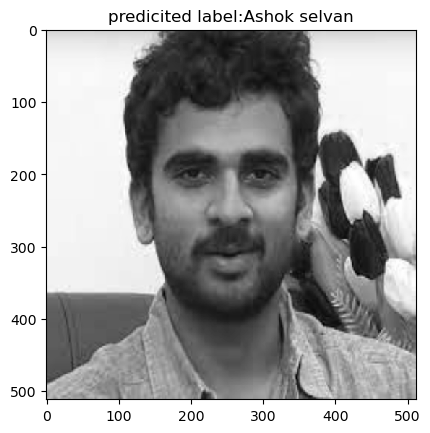

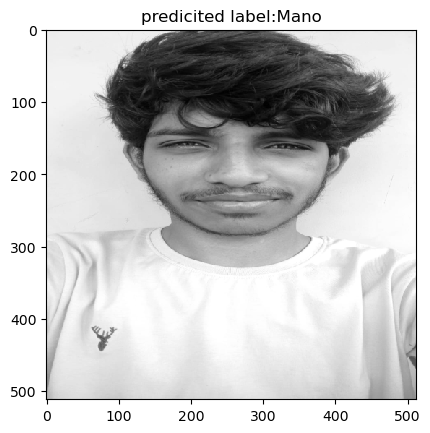

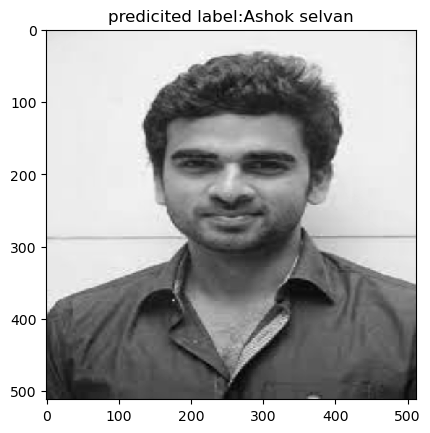

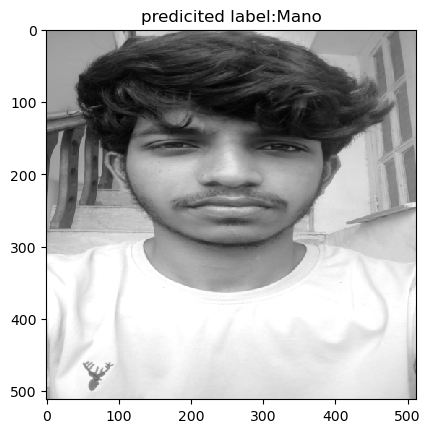

In [217]:
for i in (np.random.randint(0,6,4)):
    predicted_images = (np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicited label:{0}'.format(y_pred[i]))
    plt.imshow(predicted_images,interpolation='nearest',cmap='gray')
    plt.show()

In [218]:
from sklearn import metrics

In [219]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [220]:
accuracy

1.0

In [221]:
from sklearn.metrics import confusion_matrix

In [222]:
confusion_matrix(y_test,y_pred)

array([[2, 0, 0],
       [0, 2, 0],
       [0, 0, 4]], dtype=int64)